In [132]:
import numpy as np
import pandas as pd

from sklearn import preprocessing

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn_pandas import DataFrameMapper
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [112]:
bank = pd.read_csv('bankData.csv')

1. Perform the required data cleaning and attribute relevance analysis to shortlist the required
attributes for a Bayesian based classification model




In [113]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [114]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [115]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [116]:
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [117]:
#bank['y'] = bank['y'].map({'yes': 1, 'no': 0})

In [118]:
dummies = []

In [119]:
for col in bank.columns:
    if(bank[col].dtype=='object'):
        dummies.append(col)

In [120]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
#attarr = ["checkin_acc", "credit_history","savings_acc", "present_emp_since","personal_status","inst_plans","job"]
for att in dummies:
    le.fit(bank[att])
    bank[att] = le.transform(bank[att])

2. Use the scikit learn pipelines to perform the preprocessing - standardizing, encoding and
model fitting in one step.

In [121]:
x = bank.loc[:, bank.columns != 'y']
y = bank['y']
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state=0)


In [122]:
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,0
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,0
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3,0
4,59,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,7,1,1,0,-333,1,0,0,30,5,329,5,-1,0,3,0
4517,57,6,1,2,1,-3313,1,1,2,9,8,153,1,-1,0,3,0
4518,57,9,1,1,0,295,0,0,0,19,1,151,11,-1,0,3,0
4519,28,1,1,1,0,1137,0,0,0,6,3,129,4,211,3,1,0


In [123]:
pipe = Pipeline([
    ('nb',GaussianNB())
])

In [124]:
pipe.fit(x_train, y_train)

Pipeline(steps=[('nb', GaussianNB())])

In [125]:
pipe.score(x_test, y_test)

0.8205128205128205

In [129]:
y_pred = pipe.predict(x_test)

3. Perform Bayes classification using cross validation.

In [126]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(GaussianNB(),x_train, y_train, cv=5)

In [127]:
score

array([0.81710914, 0.80678466, 0.84955752, 0.83923304, 0.84365782])

4. Tabulate and write down the relevant measures of accuracy , Sensitivity and specificity.

In [136]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(tn, fp, fn, tp)

866 127 76 62


In [137]:
acc = tp/(tp+fp)
sens = tp/(tp+fn)
spec = tn/(tn+fp)

In [139]:
print(acc, sens, spec)

0.328042328042328 0.4492753623188406 0.8721047331319235


5. Visualize the ROC curve and write down the roc_auc and comment on the performance of
the classifier.

In [130]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)

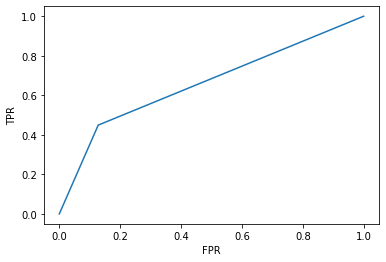

In [133]:
plt.plot(fpr,tpr)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

In [134]:
roc_auc_score(y_test, y_pred)

0.660690047725382